logistic




✅ Data Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.3

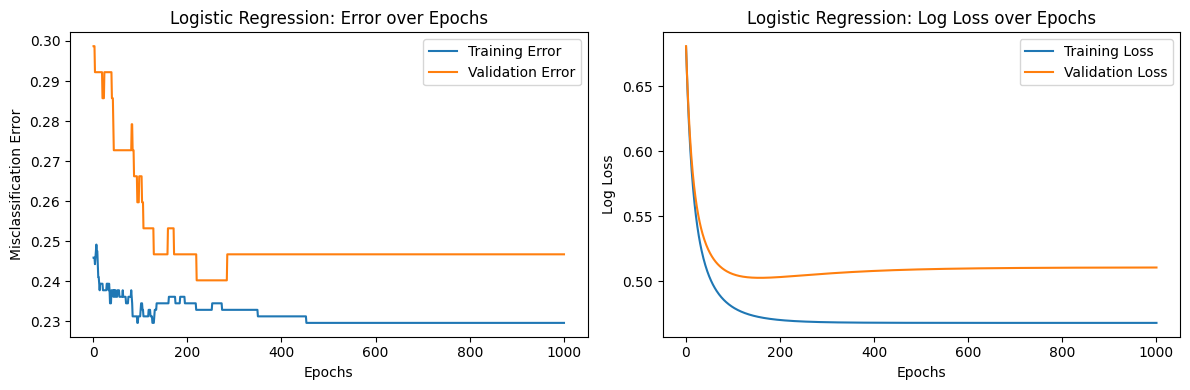

Confusion Matrix:
 [[79 20]
 [18 37]]
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607



perceptron




✅ Data Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.0

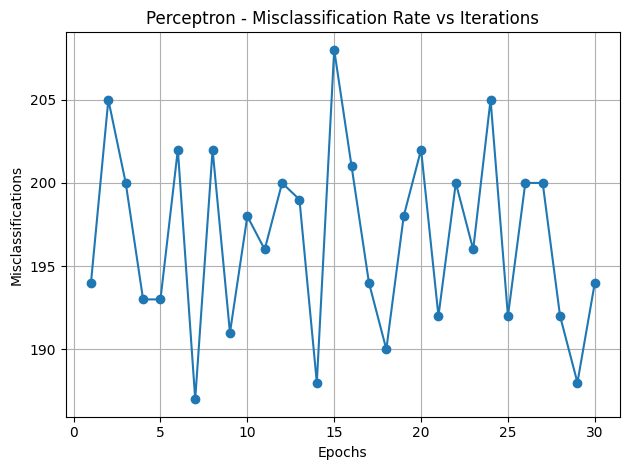

Confusion Matrix:
 [[97  2]
 [50  5]]
Accuracy: 0.6623
Precision: 0.7143
Recall: 0.0909
F1 Score: 0.1613



naive bayes




✅ Data Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



import numpy as np
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score





# ---------- Utility Functions ----------

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred):
    epsilon = 1e-15  # prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def misclassification_error(y_true, y_pred_probs, threshold=0.5):
    y_pred_labels = (y_pred_probs >= threshold).astype(int)
    return np.mean(y_pred_labels != y_true)


import pandas as pd

def load_diabetes_data():
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
               "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

    try:
        data = pd.read_csv(url, header=None, names=columns)
        print("✅ Data Loaded Successfully")
        print(data.head())
        print("\nSummary Statistics:\n", data.describe())
        return data
    except Exception as e:
        print("❌ Error loading data:", e)
        return None


# ---------- Logistic Regression Model ----------

def logistic_regression(X_train, y_train, X_val, y_val, lr=0.1, epochs=1000):
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0

    train_errors = []
    val_errors = []
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X_train, w) + b
        y_pred = sigmoid(z)

        # Gradients
        dw = (1 / m) * np.dot(X_train.T, (y_pred - y_train))
        db = (1 / m) * np.sum(y_pred - y_train)

        # Update weights
        w -= lr * dw
        b -= lr * db

        # Evaluate
        train_pred_probs = sigmoid(np.dot(X_train, w) + b)
        val_pred_probs = sigmoid(np.dot(X_val, w) + b)

        train_error = misclassification_error(y_train, train_pred_probs)
        val_error = misclassification_error(y_val, val_pred_probs)

        train_loss = log_loss(y_train, train_pred_probs)
        val_loss = log_loss(y_val, val_pred_probs)

        train_errors.append(train_error)
        val_errors.append(val_error)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return w, b, train_errors, val_errors, train_losses, val_losses

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred_probs, threshold=0.5):
    y_pred = (y_pred_probs >= threshold).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")



def plot_learning_curves(train_errors, val_errors, train_losses, val_losses):
    epochs = range(1, len(train_errors) + 1)

    plt.figure(figsize=(12, 4))

    # Misclassification Error
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_errors, label="Training Error")
    plt.plot(epochs, val_errors, label="Validation Error")
    plt.xlabel("Epochs")
    plt.ylabel("Misclassification Error")
    plt.title("Logistic Regression: Error over Epochs")
    plt.legend()

    # Log Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Log Loss")
    plt.title("Logistic Regression: Log Loss over Epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()





class Perceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.errors = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []

        for _ in range(self.epochs):
            error_count = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error_count += int(update != 0.0)
            self.errors.append(error_count)

        return self.weights, self.bias

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def plot_errors(self):
        plt.plot(range(1, len(self.errors) + 1), self.errors, marker='o')
        plt.xlabel("Epochs")
        plt.ylabel("Misclassifications")
        plt.title("Perceptron - Misclassification Rate vs Iterations")
        plt.grid(True)
        plt.tight_layout()
        plt.show()





def run_model(regression_algo = "logistic"):

  # Load real diabetes data
  data = load_diabetes_data()

  # Extract features and labels
  X = data.drop("Outcome", axis=1).values
  y = data["Outcome"].values

  # Optionally normalize features (recommended for logistic regression)

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Split into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



  if regression_algo == "logistic":
     # Train
    w, b, train_errors, val_errors, train_losses, val_losses = logistic_regression(X_train, y_train, X_val, y_val)

    # Plot
    plot_learning_curves(train_errors, val_errors, train_losses, val_losses)


    # Predict on validation set
    y_val_pred_probs = sigmoid(np.dot(X_val, w) + b)

    # Evaluate
    evaluate_model(y_val, y_val_pred_probs)



  elif regression_algo == "perceptron":

    # Train Perceptron
    model = Perceptron(lr=0.01, epochs=30)
    model.fit(X_train, y_train)

    # Plot error curve
    model.plot_errors()


    y_val_pred = model.predict(scaler.transform(X_val))
    evaluate_model(y_val, y_val_pred)

  elif regression_algo == "naive_bayes":

    # Train model
    model = GaussianNB()
    model.fit(X_train, y_train)

      # Predict
    y_val_pred = model.predict(X_val)

    # Evaluate
    evaluate_model(y_val, y_val_pred)




#run each model and evaluate
print("logistic\n\n\n\n")

run_model("logistic")


print("\n\n\nperceptron\n\n\n\n")


run_model("perceptron")

print("\n\n\nnaive bayes\n\n\n\n")

run_model("naive_bayes")